In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_arrow(line, position=None, direction='right', size=25, color=None, lw=2):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color, lw=lw),
        size=size
    )

In [3]:
def phi(t,y):
    # define the right-hand size of the ODE
    return 1-2*t*y

def euler(phi,t0,y0,t1,n):
    dt = float(t1-t0)/n
    t = np.linspace(t0,t1,n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for k in range(n):
        y[k+1] = y[k]+phi(t[k],y[k])*dt
    return t, y

In [4]:
fig_width = 3
fig_height = 5
slope_field_n = 15
slope_field_scale = 15
slope_field_width = 0.009
integral_curve_n = 1000
width_curve = 2
label_fontsize = 16
tick_fontsize = 12
arrow_size = 40
color_slope = '#ffb6c1'
color_curve = '#000000'

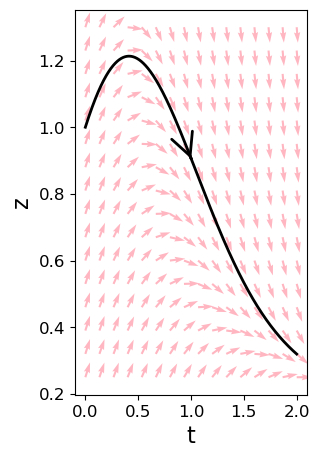

In [8]:

# Input
t0 = 0
y0 = 1
t1 = 2

plt.figure(figsize=(fig_width, fig_height))
plt.xlabel('t', fontsize=label_fontsize)
plt.ylabel('z', fontsize=label_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xticks(fontsize=tick_fontsize)

# Draw the slope field
t = np.linspace(t0, t1, slope_field_n+1)
y = np.linspace(0.25, 1.25, slope_field_n+1)
t, y = np.meshgrid(t,y)
dt = 1.0
dy = phi(t,y)
L = np.sqrt(dt*dt+dy*dy)
dt = dt/L
dy = dy/L

plt.quiver(t, y, dt, dy, color=color_slope, angles="xy", scale=slope_field_scale, width=slope_field_width)

t, ysol = euler(phi,t0,y0,t1,integral_curve_n)

# Plot the solution curves 
line = plt.plot(t, ysol, color=color_curve, linewidth=width_curve)[0]

add_arrow(line, size=arrow_size, lw=width_curve)
plt.savefig('ivp_forward1.svg')
plt.show()

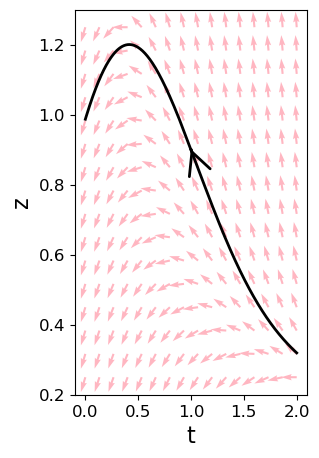

In [6]:
# Input
# t0 = 0
# y0 = 1
# t1 = 2

t0 = 2
y0 = 0.31953683
t1 = 0

plt.figure(figsize=(fig_width, fig_height))
plt.xlabel('t', fontsize=label_fontsize)
plt.ylabel('z', fontsize=label_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xticks(fontsize=tick_fontsize)

# Draw the slope field
t = np.linspace(t0, t1, slope_field_n+1)
y = np.linspace(0.25, 1.25, slope_field_n+1)
t, y = np.meshgrid(t,y)
dt = -1.0
dy = -phi(t,y)
L = np.sqrt(dt*dt+dy*dy)
dt = dt/L
dy = dy/L
plt.quiver(t, y, dt, dy, color=color_slope, angles="xy", scale=slope_field_scale, width=slope_field_width)

# t, ysol = scipy_dopri5(phi,t0,y0,t1,n)
t, ysol = euler(phi,t0,y0,t1,integral_curve_n) 

# Plot the solution curves 
line = plt.plot(t, ysol, color=color_curve, linewidth=width_curve)[0]

add_arrow(line, size=arrow_size, lw=width_curve)
plt.savefig('ivp_backward1.svg')
plt.show()